In [1]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from scipy import sparse
import xgboost as xgb

In [3]:
df = pd.read_json('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/train.json')
df1 = pd.read_json('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/test.json')
df =df.reset_index()
y_train = df["interest_level"]
y_train  = np.where(y_train =='low', 0,np.where(y_train=='medium', 1, 2))

In [4]:
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if df[f].dtype=='object':
            #print(f)
            lbl = pp.LabelEncoder()
            lbl.fit(list(df[f].values) + list(df1[f].values))
            df[f] = lbl.transform(list(df[f].values))
            df1[f] = lbl.transform(list(df1[f].values))
            print(f)
            

display_address
manager_id
building_id
street_address


In [5]:
df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df1["num_description_words"] = df1["description"].apply(lambda x: len(x.split(" ")))

In [6]:
#feature column
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
df['features'] = df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
df1['features'] = df1["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print(df["features"].head())
tfidf = CountVectorizer(stop_words='english', max_features=200)
tr_sparse = tfidf.fit_transform(df["features"])
te_sparse = tfidf.transform(df1["features"])

0                                                     
1    Doorman Elevator Fitness_Center Cats_Allowed D...
2    Laundry_In_Building Dishwasher Hardwood_Floors...
3                               Hardwood_Floors No_Fee
4                                              Pre-War
Name: features, dtype: object


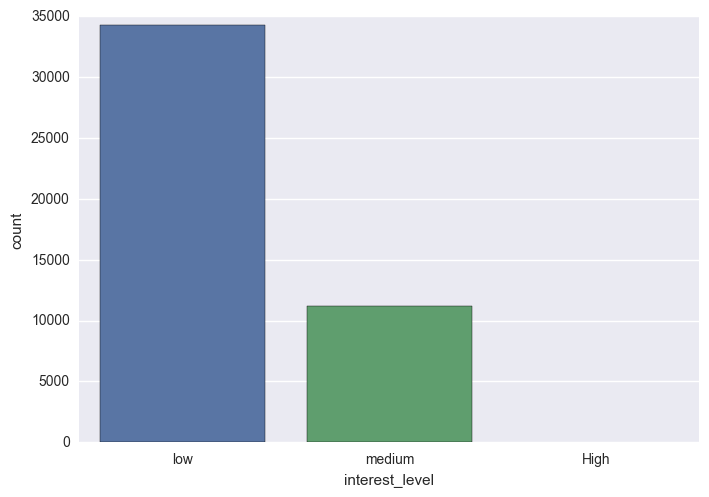

In [7]:
sns.countplot(df['interest_level'],order = ['low','medium','High'])
plt.show()

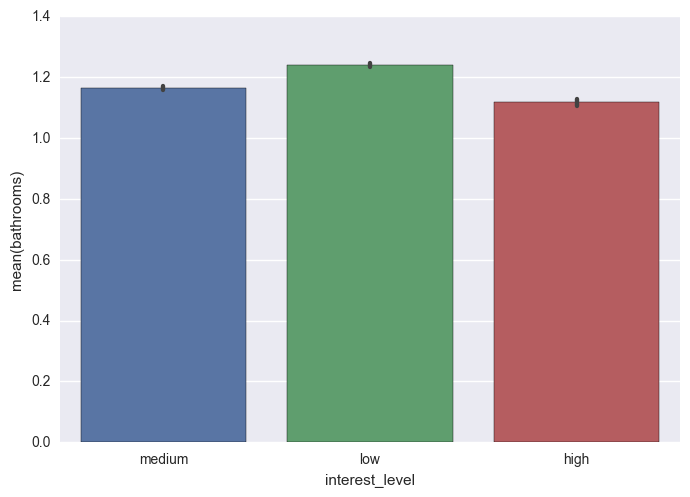

In [8]:
sns.barplot(x='interest_level',y='bathrooms',data=df)
plt.show()

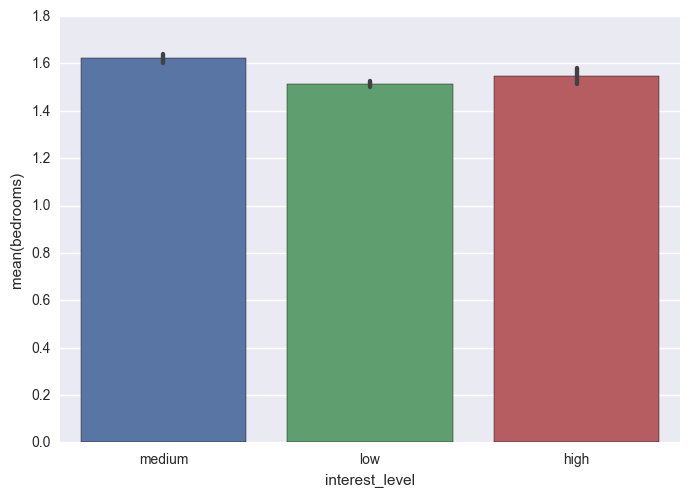

In [9]:
sns.barplot(x='interest_level',y='bedrooms',data=df)
plt.show()

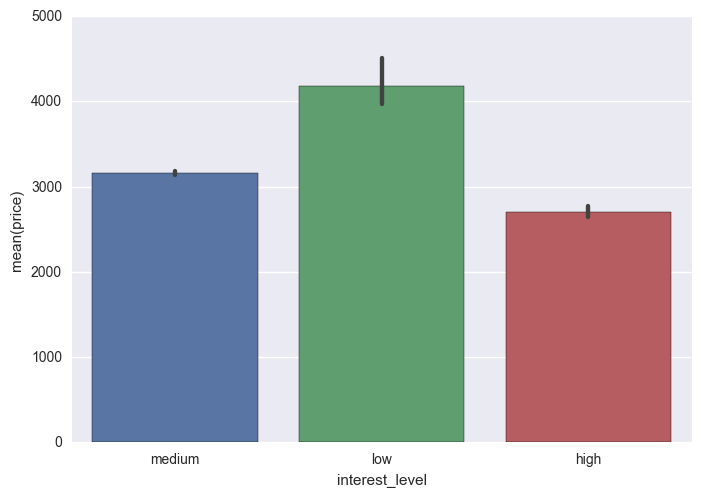

In [10]:
sns.barplot(x='interest_level',y='price',data=df)
plt.show()

In [11]:
df.head(20)

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,num_description_words
0,10,1.5,3,3797,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,12282,,medium,40.7145,7211212,-73.9425,1568,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,23484,95
1,10000,1.0,2,8986,2016-06-12 12:19:27,,9080,Doorman Elevator Fitness_Center Cats_Allowed D...,low,40.7947,7150865,-73.9667,1988,[https://photos.renthop.com/2/7150865_be3306c5...,5465,23680,9
2,100004,1.0,1,8889,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",13719,Laundry_In_Building Dishwasher Hardwood_Floors...,high,40.7388,6887163,-74.0018,3733,[https://photos.renthop.com/2/6887163_de85c427...,2850,9827,94
3,100007,1.0,1,1848,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,10866,Hardwood_Floors No_Fee,low,40.7539,6888711,-73.9677,282,[https://photos.renthop.com/2/6888711_6e660cee...,3275,14237,80
4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,15072,Pre-War,low,40.8241,6934781,-73.9493,2618,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,19227,68
5,100014,2.0,4,2544,2016-04-19 04:24:47,,15194,,medium,40.7429,6894514,-74.0028,3081,[https://photos.renthop.com/2/6894514_9abb8592...,7995,15263,9
6,100016,1.0,2,2711,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,14964,prewar elevator Dogs_Allowed Cats_Allowed LOWR...,low,40.8012,6930771,-73.9660,12,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,7466,87
7,100020,2.0,1,169,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",15223,Doorman Elevator Pre-War Terrace Laundry_in_Un...,low,40.7427,6867392,-73.9957,3959,[https://photos.renthop.com/2/6867392_b18283f6...,5645,4181,134
8,100026,1.0,1,7635,2016-04-20 02:36:35,<p><a website_redacted,11646,Cats_Allowed Dogs_Allowed Elevator Laundry_In_...,medium,40.8234,6898799,-73.9457,3339,[https://photos.renthop.com/2/6898799_3759be4c...,1725,21836,4
9,100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,6459,Dishwasher Hardwood_Floors,low,40.7278,6814332,-73.9808,633,[https://photos.renthop.com/2/6814332_e19a8552...,5800,20000,166


In [12]:
df.groupby(['interest_level','building_id']).count()

index  bathrooms  bedrooms  created  description  \
interest_level building_id                                                     
high           0              195        195       195      195          195   
               2                2          2         2        2            2   
               5                1          1         1        1            1   
               8                1          1         1        1            1   
               16               4          4         4        4            4   
               23               1          1         1        1            1   
               33               1          1         1        1            1   
               43               1          1         1        1            1   
               66               1          1         1        1            1   
               77               2          2         2        2            2   
               82               1          1         1        1            1   
               92               1          1         1        1            1   
               94               1          1         1        1            1   
               98               3          3         3        3            3   
               100              1          1         1        1            1   
               106              1          1         1        1            1   
               110              1          1         1        1            1   
               114              2          2         2        2            2   
               121              1          1         1        1            1   
               123              1          1         1        1            1   
               131              1          1         1        1            1   
               135              1          1         1        1            1   
               145              1          1         1        1            1   
               154              1          1         1        1            1   
               157              1          1         1        1            1   
               161              1          1         1        1            1   
               169              2          2         2        2            2   
               173              1          1         1        1            1   
               180              1          1         1        1            1   
               183              3          3         3        3            3   
...                           ...        ...       ...      ...          ...   
medium         11540            1          1         1        1            1   
               11541            1          1         1        1            1   
               11542            1          1         1        1            1   
               11544            1          1         1        1            1   
               11554            3          3         3        3            3   
               11559            5          5         5        5            5   
               11563            2          2         2        2            2   
               11565            1          1         1        1            1   
               11566            1          1         1        1            1   
               11569            1          1         1        1            1   
               11570            4          4         4        4            4   
               11573            1          1         1        1            1   
               11575            1          1         1        1            1   
               11577           26         26        26       26           26   
               11579            1          1         1        1            1   
               11582            1          1         1        1            1   
               11590            1          1         1        1            1   
               11593        

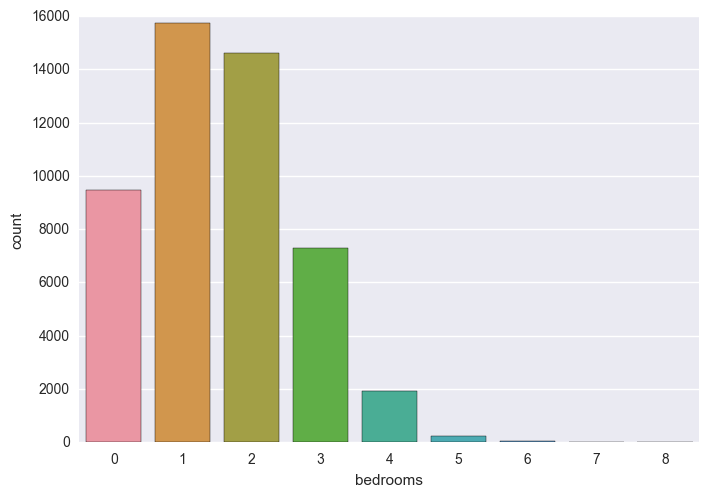

In [13]:
sns.countplot(df.bedrooms)
plt.show()

In [14]:
df.groupby(['interest_level','bedrooms']).count()

index  bathrooms  building_id  created  description  \
interest_level bedrooms                                                        
high           0           847        847          847      847          847   
               1           943        943          943      943          943   
               2          1306       1306         1306     1306         1306   
               3           592        592          592      592          592   
               4           149        149          149      149          149   
               5             2          2            2        2            2   
low            0          6518       6518         6518     6518         6518   
               1         11715      11715        11715    11715        11715   
               2          9801       9801         9801     9801         9801   
               3          4727       4727         4727     4727         4727   
               4          1233       1233         1233     1233         1233   
               5           243        243          243      243          243   
               6            44         44           44       44           44   
               7             1          1            1        1            1   
               8             2          2            2        2            2   
medium         0          2110       2110         2110     2110         2110   
               1          3094       3094         3094     3094         3094   
               2          3516       3516         3516     3516         3516   
               3          1957       1957         1957     1957         1957   
               4           547        547          547      547          547   
               5             2          2            2        2            2   
               6             2          2            2        2            2   
               7             1          1            1        1            1   

                         display_address  features  latitude  listing_id  \
interest_level bedrooms                                                    
high           0                     847       847       847         847   
               1                     943       943       943         943   
               2                    1306      1306      1306        1306   
               3                     592       592       592         592   
               4                     149       149       149         149   
               5                       2         2         2           2   
low            0                    6518      6518      6518        6518   
               1                   11715     11715     11715       11715   
               2                    9801      9801      9801        9801   
               3                    4727      4727      4727        4727   
               4                    1233      1233      1233        1233   
               5                     243       243       243         243   
               6                      44        44        44          44   
               7                       1         1         1           1   
               8                       2         2         2           2   
medium         0                    2110      2110      2110        2110   
               1                    3094      3094      3094        3094   
               2                    3516      3516      3516        3516   
               3                    1957      1957      1957        1957   
               4                     547       547       547         547   
               5                       2         2         2           2   
               6                       2         2         2           2   
               7                       1         1         1           1   

                         longitude  manager_id  photos  price  street_address  \
interest_level bedrooms                   

In [15]:
df['bath2bed'] = np.where(df['bedrooms']!=0,df['bathrooms']/df['bedrooms'],0)
df1['bath2bed'] = np.where(df1['bedrooms']!=0,df1['bathrooms']/df1['bedrooms'],0)
df.groupby(['interest_level','bath2bed']).count()

index  bathrooms  bedrooms  building_id  created  \
interest_level bath2bed                                                     
high           0.000000    847        847       847          847      847   
               0.250000     31         31        31           31       31   
               0.333333    388        388       388          388      388   
               0.400000      2          2         2            2        2   
               0.500000   1323       1323      1323         1323     1323   
               0.666667    197        197       197          197      197   
               0.750000      7          7         7            7        7   
               1.000000   1034       1034      1034         1034     1034   
               1.333333      2          2         2            2        2   
               2.000000      6          6         6            6        6   
               3.000000      2          2         2            2        2   
low            0.000000   6672       6672      6672         6672     6672   
               0.166667      1          1         1            1        1   
               0.200000     10         10        10           10       10   
               0.250000    230        230       230          230      230   
               0.300000      5          5         5            5        5   
               0.333333   2081       2081      2081         2081     2081   
               0.375000     53         53        53           53       53   
               0.400000    126        126       126          126      126   
               0.416667      1          1         1            1        1   
               0.500000   7485       7485      7485         7485     7485   
               0.600000     36         36        36           36       36   
               0.625000     38         38        38           38       38   
               0.666667   1821       1821      1821         1821     1821   
               0.700000      3          3         3            3        3   
               0.750000    318        318       318          318      318   
               0.800000     40         40        40           40       40   
               0.833333    143        143       143          143      143   
               0.875000     33         33        33           33       33   
               0.900000      7          7         7            7        7   
...                        ...        ...       ...          ...      ...   
               1.100000      2          2         2            2        2   
               1.125000     21         21        21           21       21   
               1.166667     33         33        33           33       33   
               1.200000      3          3         3            3        3   
               1.250000    100        100       100          100      100   
               1.333333     14         14        14           14       14   
               1.375000      3          3         3            3        3   
               1.400000      1          1         1            1        1   
               1.500000    189        189       189          189      189   
               1.750000      1          1         1            1        1   
               2.000000    174        174       174          174      174   
               2.500000      2          2         2            2        2   
               3.000000     11         11        11           11       11   
               4.500000      1          1         1            1        1   
               5.000000      1          1         1            1        1   
medium         0.000000   2112       2112      2112         2112     2112   
               0.250000    105        105       105          105      105   
               0.333333   1136       1136      1136         1136     1136   
               0.375000      8          8         8            8        8   
               0.4000

In [16]:


df['c_features']=df.features.str.len()
df['c_photos']=df.photos.str.len()
df1['c_photos']=df1.photos.str.len()
df1['c_features']=df1.features.str.len()
df.columns
df.head()
df=df.drop(["index","interest_level","listing_id","created","description","features","latitude","longitude","manager_id","photos"],axis=1)
df1=df1.drop(["listing_id","created","description","features","latitude","longitude","manager_id","photos"],axis=1)


In [17]:
train_X = sparse.hstack([df, tr_sparse]).tocsr()
test_X = sparse.hstack([df1, te_sparse]).tocsr()

In [18]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.03
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [24]:
preds, model = runXGB(train_X, y_train, test_X, num_rounds=2)
out_df = pd.DataFrame(preds)
out_df.columns = ["high", "medium", "low"]
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/xb2.csv', out_df, delimiter=',')


In [20]:
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/xb1.csv', predictions, delimiter=',')

In [98]:
md1 = lm.LogisticRegression()
md1.fit(train_X,y_train)
y_pred = md1.predict_proba(test_X)
md1.classes_
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/LR6.csv', y_pred, delimiter=',')

array([0, 1, 2])

In [ ]:
import sklearn.svm as svm
model = svm.SVC(probability=True) #0.65
model.fit(train_X, y_train)
y_pred=model.predict_proba(test_X)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/svm6.csv', y_pred, delimiter=',')

In [92]:
df.shape,df1.shape

((49352, 9), (74659, 9))

In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_X, y_train)
y_pred = model.predict_proba(test_X)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/RF6.csv', y_pred, delimiter=',')

In [99]:
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/pred6.csv', y_pred, delimiter=',')

In [96]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_X, y_train)
y_pred = neigh.predict_proba(test_X)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/pred3.csv', y_pred, delimiter=',')

MemoryError: 

y_pred.to_csv('C:/Users/sunny/Desktop/ML-NG/kaggle/Renhop/pred.csv')